# [Projet 3: Développez un moteur de recommandations de films](https://openclassrooms.com/projects/developpez-un-moteur-de-recommandations-de-films)

Link to raw data: [here](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Moteur+de+recommandation+de+films/imdb-5000-movie-dataset.zip).

In [1]:
import os
HOME = os.path.expanduser('~/')
HOST = os.uname()[1]
if HOST == 'Arthurs-MacBook-Pro.local':
    os.chdir(HOME+'/Documents/GitHub/OCDataSciencePath/Project3/')    # @home
elif HOST == 'Sirius.local':
    os.chdir(HOME+'Perso/GitHub/OCDataSciencePath/Project3/')         # @L2
else:
    raise ValueError('unknown host: {}'.format(HOST))
    
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline


In [8]:
if HOST == 'Arthurs-MacBook-Pro.local':
    pathToData = HOME+'xxx'    # @home
elif HOST == 'Sirius.local':
    pathToData = HOME+'Downloads/movie_metadata_CLEAN.csv'         # @L2
else:
    raise ValueError('unknown host: {}'.format(HOST))
    
df = pd.read_csv(pathToData,index_col=0)

In [9]:
def myplot(X3,col,title=''):
    f = plt.figure(figsize=(18,6))
    
    ax = f.add_subplot(1,3,1)
    ax.scatter(X3[:,0],X3[:,1],color=col)
    ax.set_xlabel(0, fontsize = 15)
    ax.set_ylabel(1, fontsize = 15)
    ax.set_title(title)
    
    ax = f.add_subplot(1,3,2)
    ax.scatter(X3[:,0],X3[:,2],color=col)
    ax.set_xlabel(0, fontsize = 15)
    ax.set_ylabel(2, fontsize = 15)
    ax.set_xlim(-4,8)
    ax.set_ylim(-2,2)

    ax = f.add_subplot(1,3,3)
    ax.scatter(X3[:,1],X3[:,2],color=col)
    ax.set_xlabel(1, fontsize = 15)
    ax.set_ylabel(2, fontsize = 15)
    ax.set_xlim(-4,8)
    ax.set_ylim(-2,2)

### Exploratory Data Analysis

In [10]:
df.sample(5)

movie_title  actor_1_name  actor_2_name  actor_3_name  \
2954    the upside of anger            60           920          1639   
2251  school for scoundrels           983          2567          1385   
60                     2012          1506          1746          3303   
2483             the prince           251             0          1604   
1429              malcolm x           485           742            47   

      duration  title_year  genres_action  genres_adventure  genres_animation  \
2954     118.0      2005.0              0                 0                 0   
2251     108.0      2006.0              0                 0                 0   
60       158.0      2009.0              1                 1                 0   
2483      93.0      2014.0              1                 0                 0   
1429     202.0      1992.0              0                 0                 0   

      genres_biography       ...        genres_mystery  genres_news  \
2954                 0       ...                     0            0   
2251                 0       ...                     0            0   
60                   0       ...                     0            0   
2483                 0       ...                     0            0   
1429                 1       ...                     0            0   

      genres_reality-tv  genres_romance  genres_sci-fi  genres_short  \
2954                  0               0              0             0   
2251                  0               0              0             0   
60                    0               0              1             0   
2483                  0               0              0             0   
1429                  0               1              0             0   

      genres_sport  genres_thriller  genres_war  genres_western  
2954             0                0           0               0  
2251             0                0           0               0  
60               0                0           0               0  
2483             0                1           0               0  
1429             0                0           0               0  

[5 rows x 32 columns]

In [11]:
X = df.filter(like='genres',axis=1).values
X.shape

(4910, 26)

In [12]:
# print(X.mean(axis=0))
# print(X.std(axis=0))
Xs = StandardScaler().fit_transform(X)

/Users/arthur/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
pca = PCA(n_components=X.shape[1])
Xpc = pca.fit_transform(Xs)

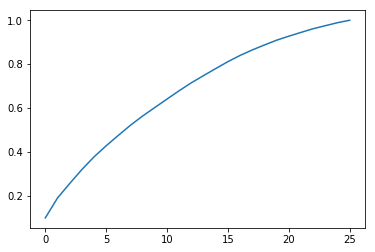

In [24]:
f = plt.figure()
ax = f.add_subplot(1,1,1)
ax.plot(pca.explained_variance_ratio_.cumsum())

In [16]:
Xpc

array([[ 1.6799988 , -2.96093266, -0.36492866],
       [ 1.47391114, -1.98839726, -0.32168183],
       [-0.11412212, -2.26976394, -0.25924562],
       ..., 
       [-1.56850249, -0.77284657,  0.20908577],
       [ 0.09098643,  1.7490293 ,  0.37074121],
       [-0.22193242,  0.54955411, -0.05472861]])

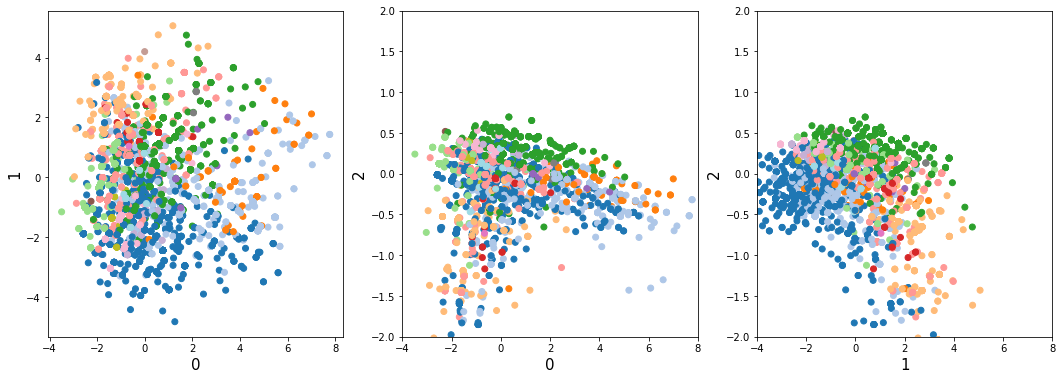

In [17]:
myplot(Xpc,cm.tab20(X.argmax(axis=1)))

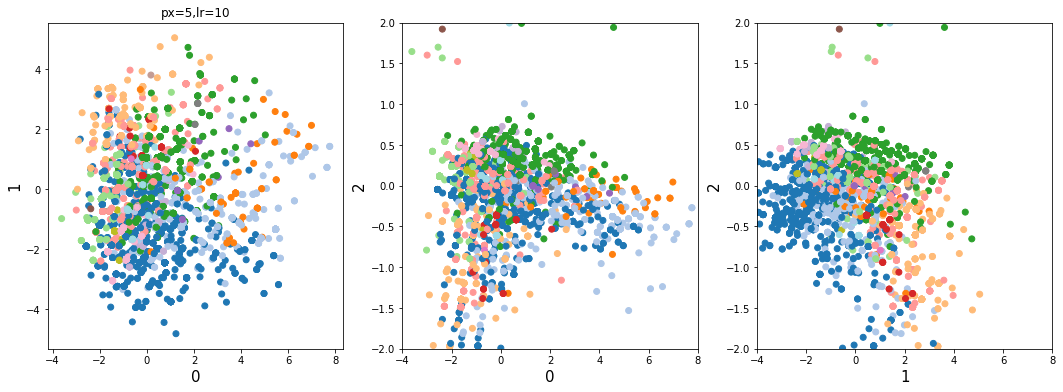

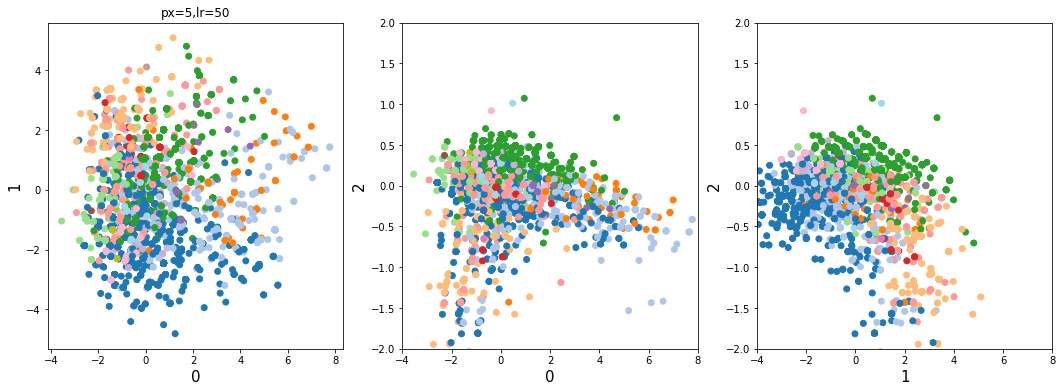

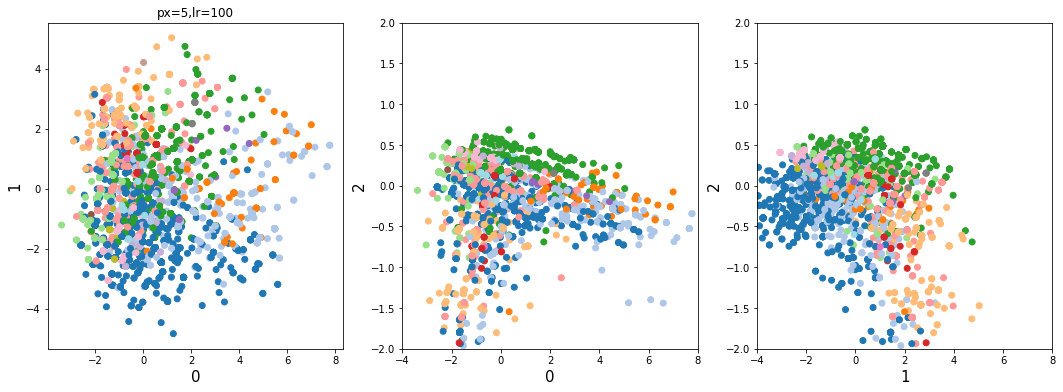

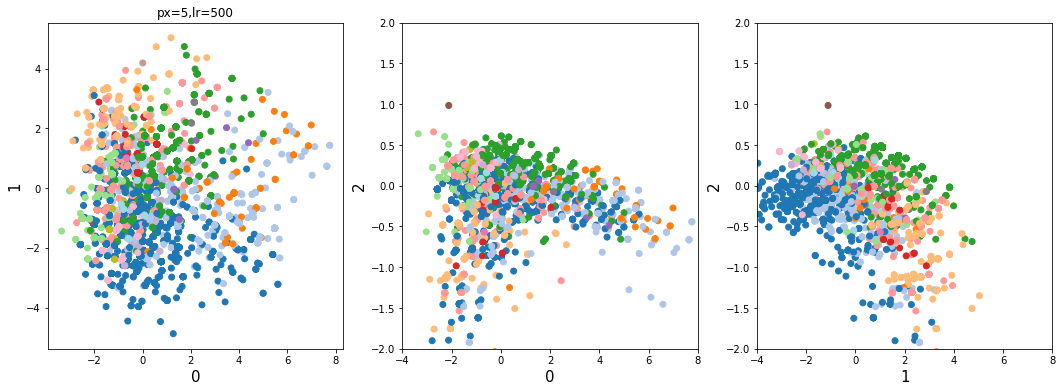

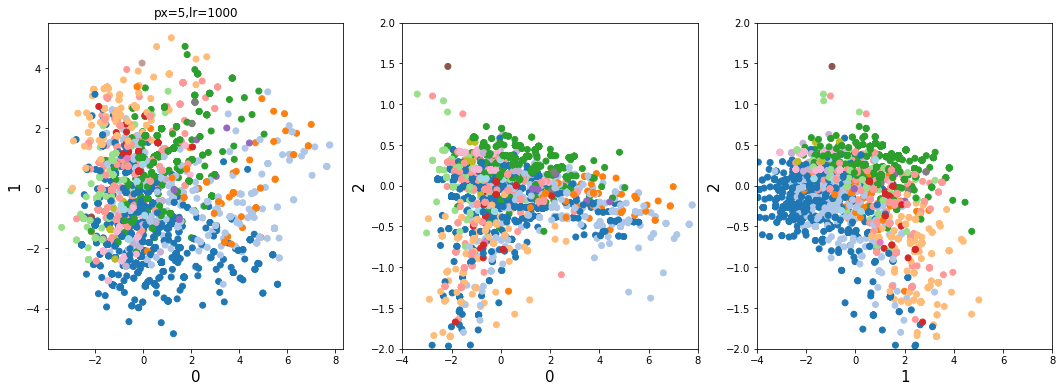

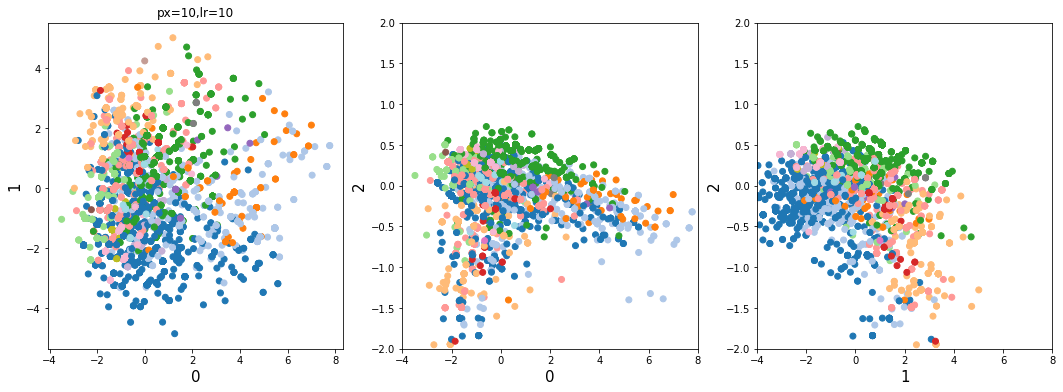

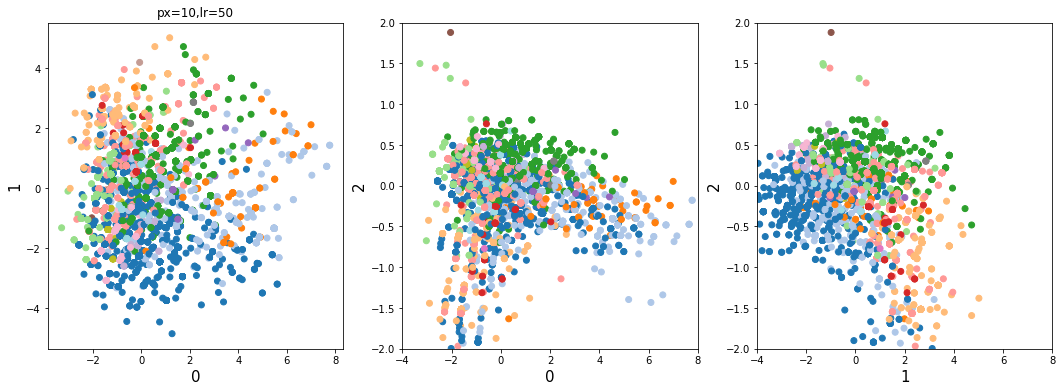

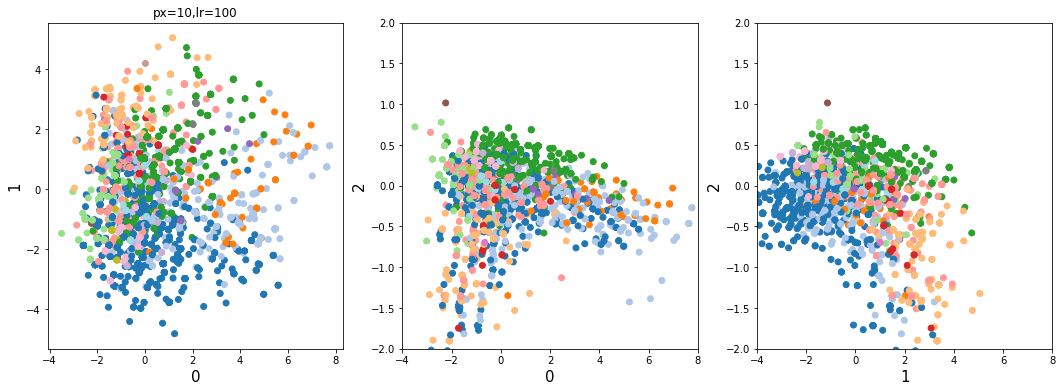

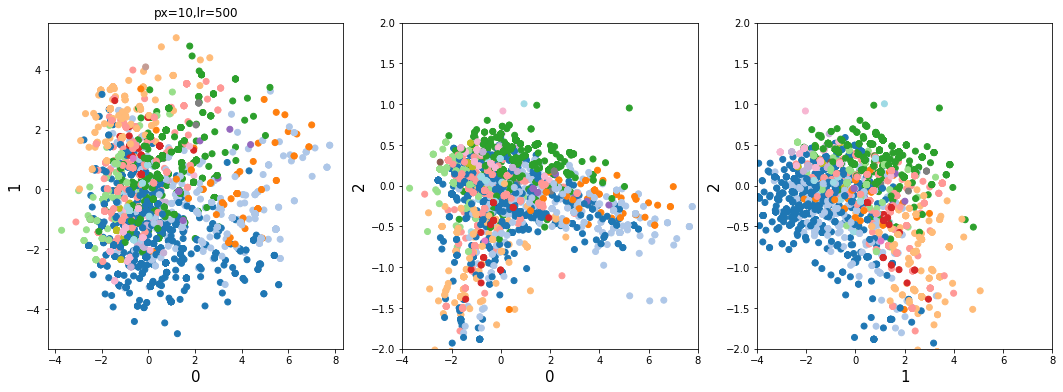

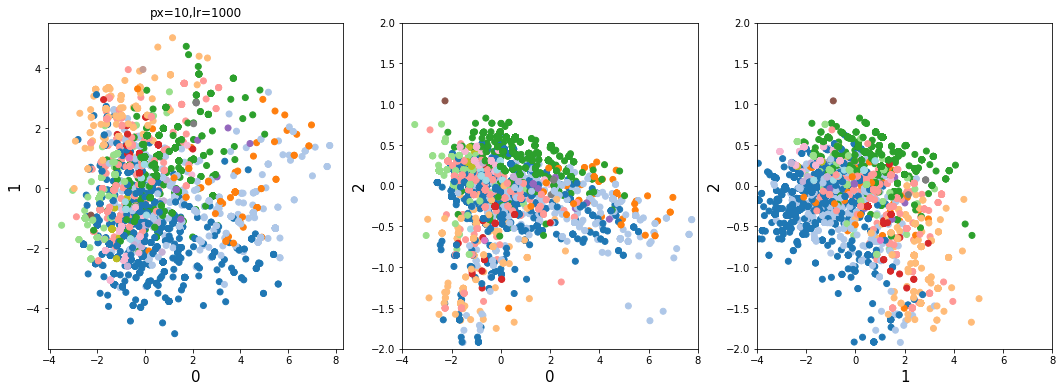

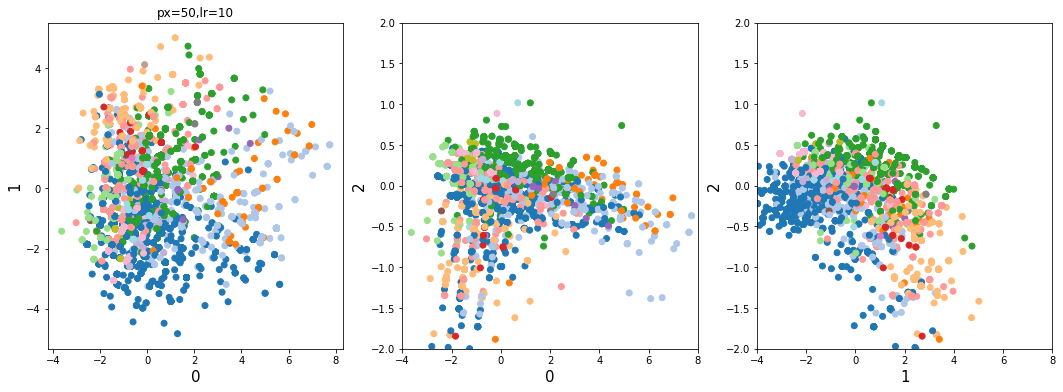

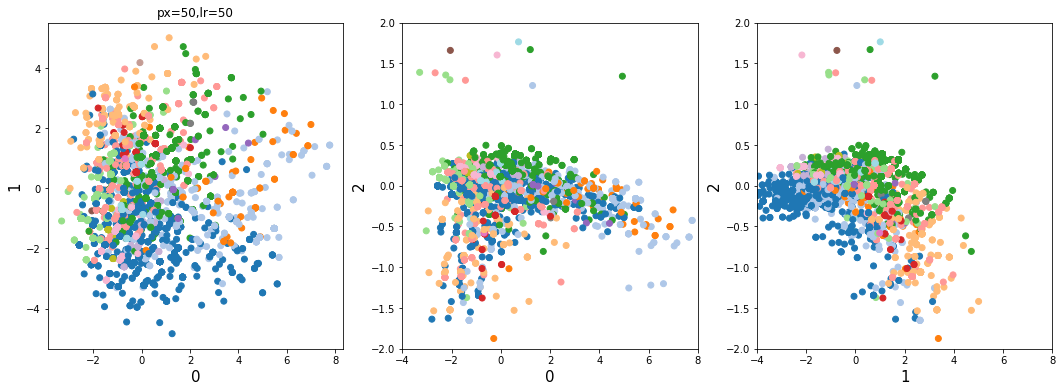

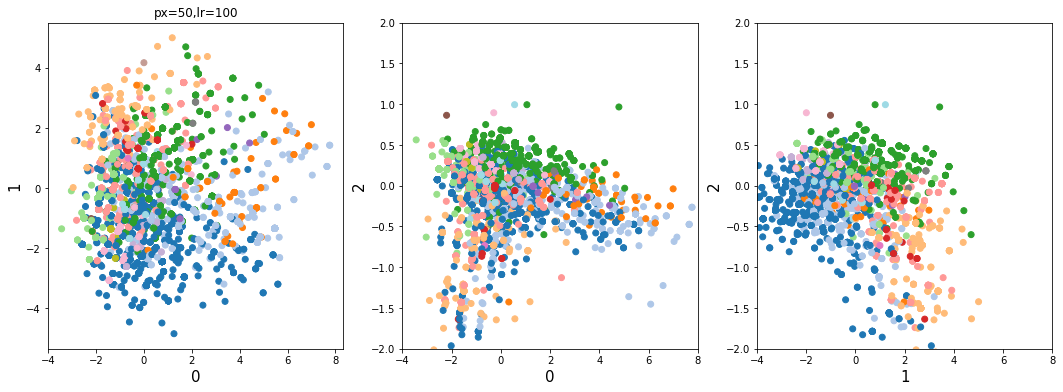

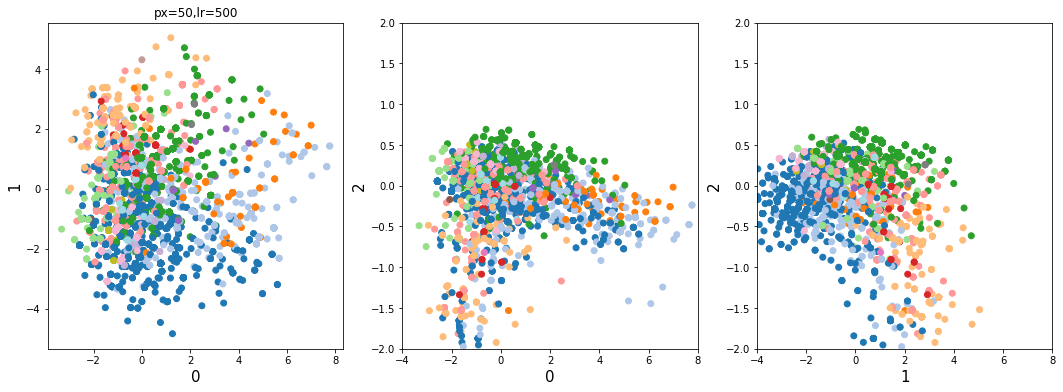

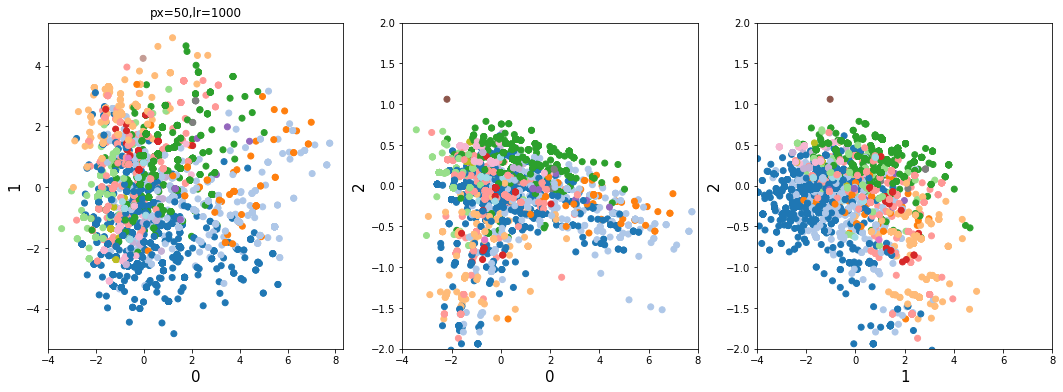

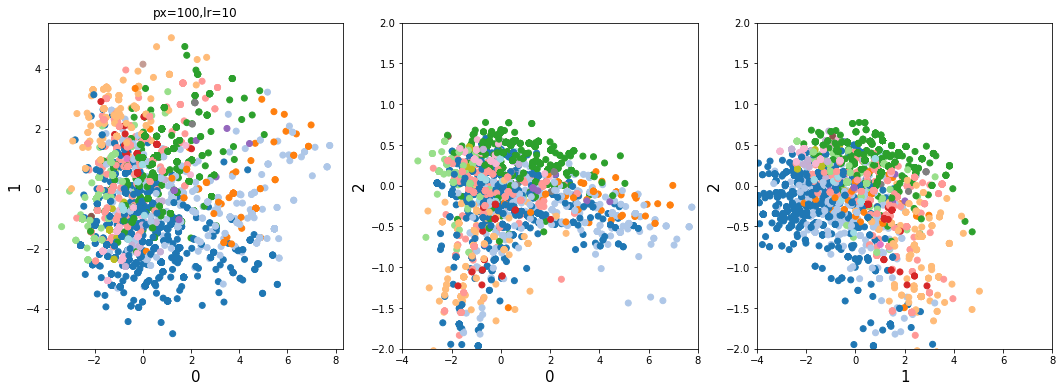

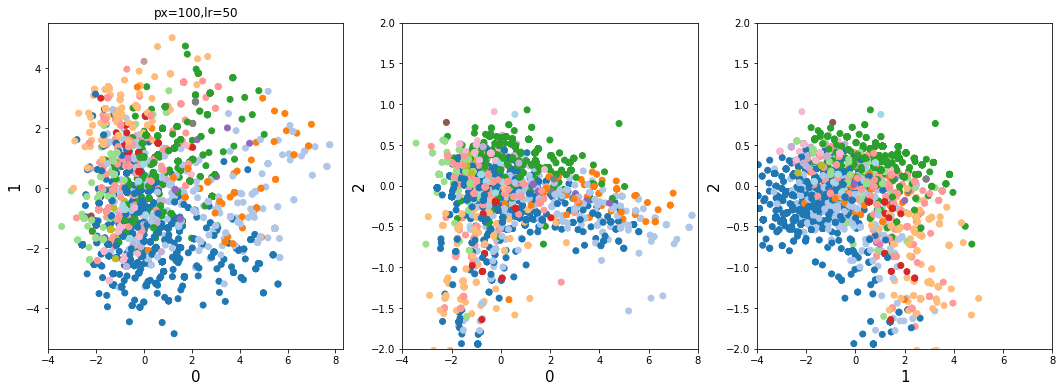

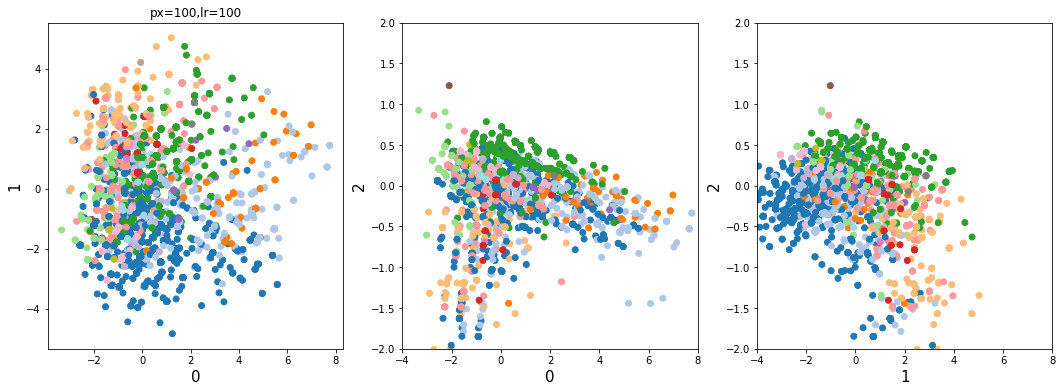

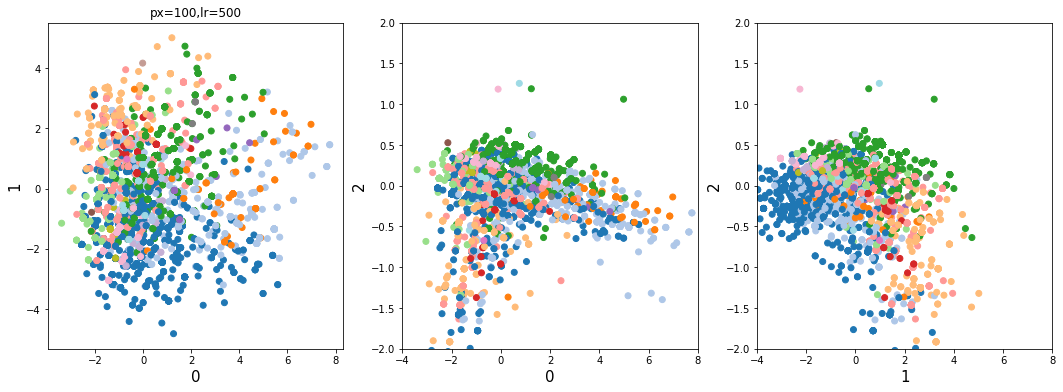

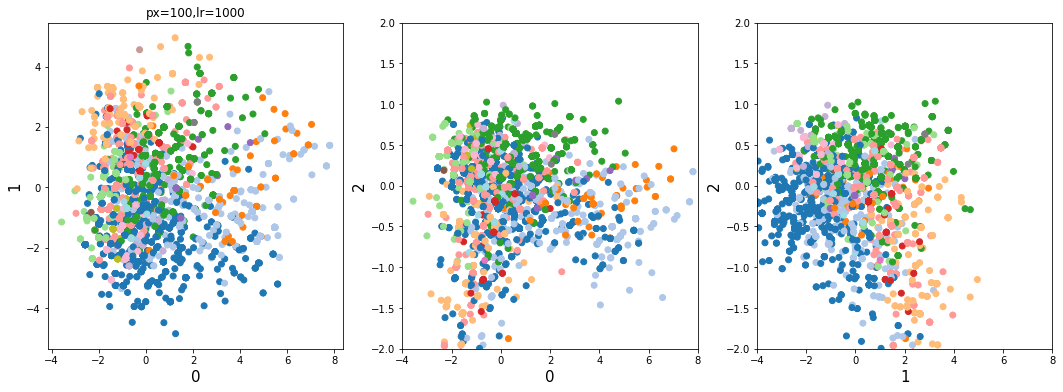

In [91]:
for px in (5,10,50,100):
    for lr in (10, 50, 100, 500, 1000):
        tsne = TSNE(n_components=3,
                    perplexity=px,
                    learning_rate=lr,
                    n_iter=1000,
                    metric='euclidean',
                    init='random',
                    verbose=0)
        Xtsne = pca.fit_transform(Xs)
        myplot(Xtsne,cm.tab20(X.argmax(axis=1)),'px={},lr={}'.format(px,lr))